In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
my_file="C:/Users/kumar/Downloads/titles.csv"
data= pd.read_csv(my_file,index_col="id")
data.head(5)

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
data.columns

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [5]:
data.shape

(5806, 14)

As we can see, there are a few columns that are not necesary to our analysis. We will delete the description, imdb_id, imdb_votes, tmdb_popularity, and seasons columns.

In [6]:
data.drop(['description','imdb_id','imdb_votes','tmdb_popularity', 'seasons'], axis=1,inplace=True)

Now let us preview the first 5 rows again.

In [7]:
data.head(5)

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,tmdb_score
id,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN,NaN
tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3,8.2
tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,7.8
tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],8.0,7.8
tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],8.1,7.7


Next we will check if there are any duplicated or null value rows.

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
imdb_score               523
tmdb_score               318
dtype: int64

We will drop any rows that have null values in them.

In [10]:
data.dropna(axis=0,how='any',inplace=True)
data.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
tmdb_score              0
dtype: int64

Let's look at a quick summary of our data, including mean, minimum, and maximum.

In [11]:
data.describe()

,release_year,runtime,imdb_score,tmdb_score
count,2909.000000,2909.000000,2909.000000,2909.000000
mean,2015.562393,69.345480,6.727191,7.049330
std,7.065471,40.432777,1.124294,1.079251
min,1964.000000,0.000000,1.600000,1.000000
25%,2014.000000,36.000000,6.100000,6.400000
50%,2018.000000,57.000000,6.800000,7.100000
75%,2020.000000,101.000000,7.500000,7.700000
max,2022.000000,229.000000,9.500000,10.000000


We are now ready to begin our analysis. 

We will compare the types of media on Netflix.

In [12]:
type_count = data.type.value_counts()
type_count.head()

SHOW     1598
MOVIE    1311
Name: type, dtype: int64

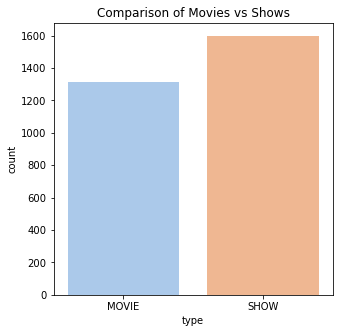

In [13]:
plt.figure(figsize=(5,5))
type_color = sns.color_palette("pastel")
sns.countplot(data=data, x='type',palette=type_color)
plt.title("Comparison of Movies vs Shows")
plt.show()

From the graph, we can see that Netflix produces and streams more TV Shows than movies.

Now, we want to discover the most popular genre of TV shows and movies that is on Netflix.

In [14]:
genre_count = data.genres.value_counts()
genre_count.head(10)

['comedy']                        152
['drama']                          92
['documentation']                  92
['reality']                        81
['comedy', 'drama']                76
['drama', 'romance']               59
['drama', 'comedy']                54
['crime', 'documentation']         42
['comedy', 'drama', 'romance']     35
['drama', 'comedy', 'romance']     34
Name: genres, dtype: int64

When we obtain a count of the genres, it seems that there are some shows and movies that have multiple genres. This is an issue because the multiple genres are contained within the brackets. As a result, we will need to parse the genre column.

In [15]:
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row
data['genres'] = data['genres'].map(get_genres)
genres

{'crime': 571,
 'drama': 1587,
 'comedy': 1142,
 'fantasy': 474,
 'horror': 233,
 'european': 201,
 'thriller': 717,
 'action': 695,
 'music': 106,
 'romance': 497,
 'family': 423,
 'western': 32,
 'animation': 467,
 'documentation': 392,
 'history': 142,
 'scifi': 455,
 'war': 97,
 'reality': 160,
 'sport': 113,
 '': 2}

In [16]:
for genre in genres.items():
    print (genre or 'none')

('crime', 571)
('drama', 1587)
('comedy', 1142)
('fantasy', 474)
('horror', 233)
('european', 201)
('thriller', 717)
('action', 695)
('music', 106)
('romance', 497)
('family', 423)
('western', 32)
('animation', 467)
('documentation', 392)
('history', 142)
('scifi', 455)
('war', 97)
('reality', 160)
('sport', 113)
('', 2)



To create a graph, we will need to use the list() function for the x and y axis.

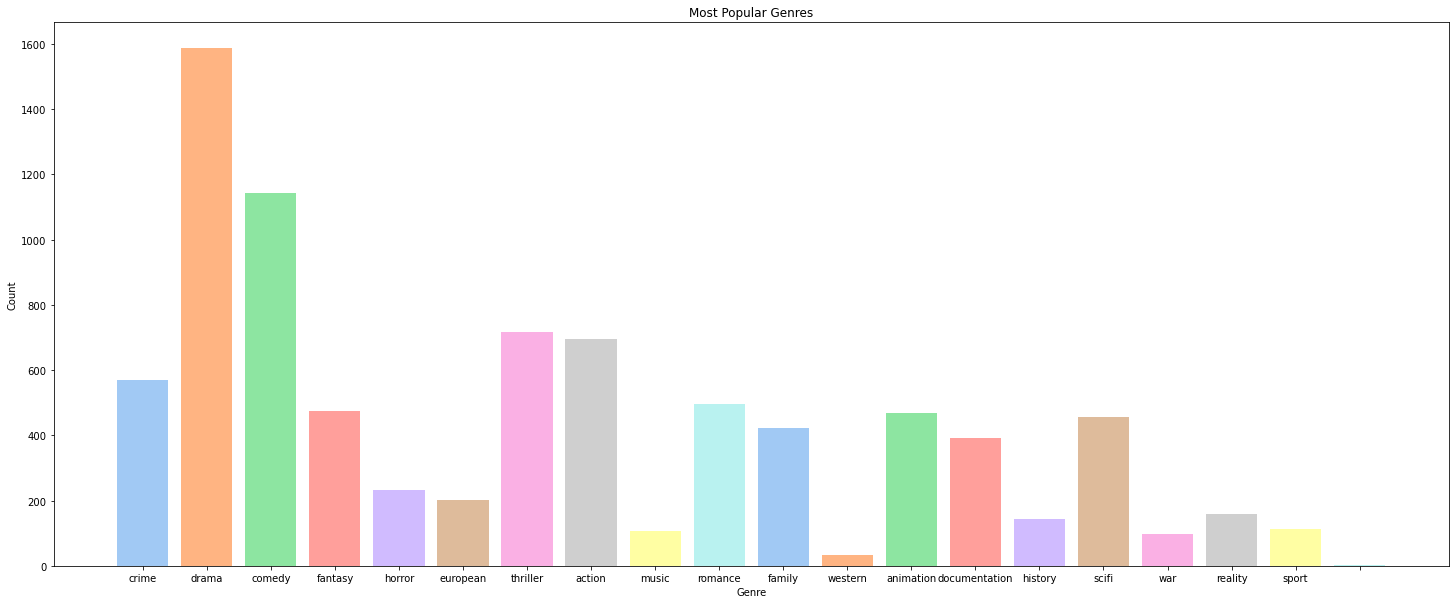

In [17]:
x_axis = list(genres.keys())
y_axis = list(genres.values())

genre_color = sns.color_palette("pastel")
plt.figure(figsize=(25,10))
plt.bar(x_axis,y_axis,color = genre_color)
plt.title("Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

Drama is the leading genre of TV shows and movies in Netflix, with over 1500 titles. Comedy follows right after, but still has less than 1000.

Next, we want to view the amount of titles that released during each year. Netflix became popularized in 2007, so we will only view the years 2007 - 2022.

Keep in mind that these titles do not include shows or movies that were released before, they will only be contemporary titles.

In [18]:
year_count = data.release_year.value_counts()
year_count.head(16)

2018    398
2021    372
2019    344
2020    339
2017    258
2016    196
2015    147
2022    115
2014     91
2013     80
2012     71
2011     68
2010     48
2009     46
2008     38
2007     34
Name: release_year, dtype: int64

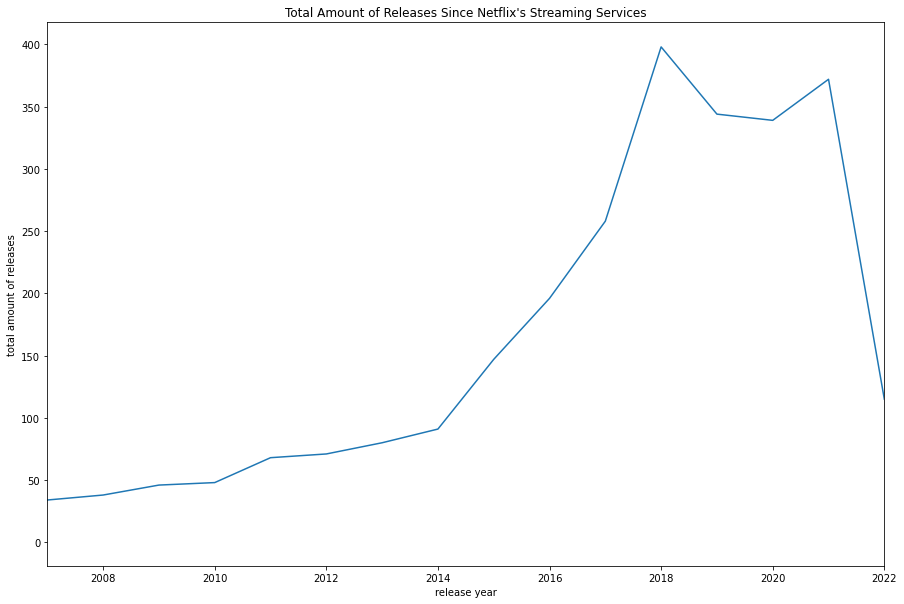

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(data=year_count)
plt.xlim(2007,2022)
plt.xlabel('release year')
plt.ylabel('total amount of releases')
plt.title("Total Amount of Releases Since Netflix's Streaming Services")
plt.show()

The movies and shows released at the time of 2018 and 2021 were the most popular. Netflix's rise of viewship in 2020 could be the result of the pandemic and lockdown, when people were mandated to stay home.

We will now view the what type of age certifications TV shows and movies most released.

The ratings for movies are as followed:
* G (General Audiences) - All ages admitted
* PG (Parental Guidance Suggested) - Some material may not be suitable for children
* PG-13 (Parents Strongly Cautioned) - Some material may be inappropriate for children under 13
* R (Restricted) - Under 17 requires accompanying parent or adult guardian
* NC-17 (Adults Only) - No one 17 and under admitted

The ratings for TV shows are as followed:
* TV-G (General Audience) - Suitable for all ages
* TV-Y (All Children) - Designed to be appropriate for all children, including children from ages 2-6
* TV-Y7 (Directed to Older Children) - Designed for children ages 7 and above
* TV-PG (Parental Guidance Suggested) - Some material may not be suitable for children
* TV-14 (Parents Strongly Cautioned) - Some material may not be suitable for children under 14
* TV-MA (Mature Audiences Only) - Designed only for adults and not suitable for children under 17

In [20]:
age_ratings = data.age_certification.value_counts()
age_ratings.head(12)

TV-MA    773
R        547
PG-13    420
TV-14    413
PG       236
TV-PG    160
TV-Y7     98
G         95
TV-Y      83
TV-G      71
NC-17     13
Name: age_certification, dtype: int64

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


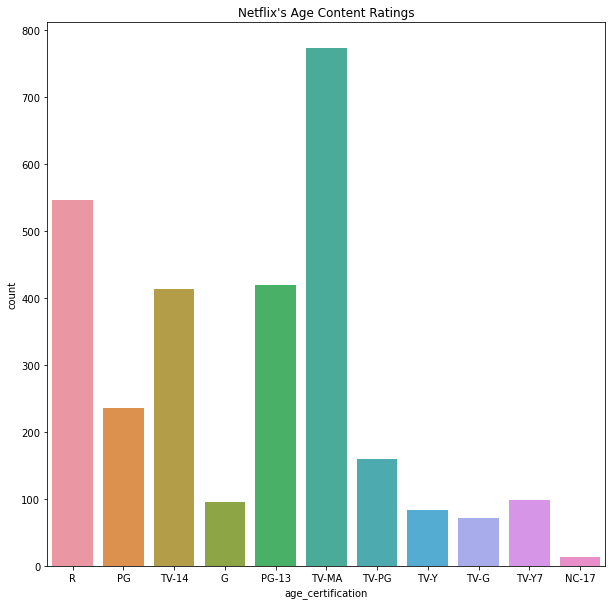

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(data['age_certification'])
plt.title("Netflix's Age Content Ratings")
plt.show()

Most TV shows have an age certification of TV-MA while most movies have an age certification of R. This makes sense as Netflix's main demographic is adults or people over the age of 17.

Let's now view where most of the TV shows and movies are produced from by country.

In [23]:
countries_count = data.production_countries.value_counts()
countries_count.head(10)

['US']    1248
['IN']     222
['JP']     189
['GB']     138
['KR']     111
['ES']      75
['CA']      55
['FR']      53
['TR']      48
['MX']      43
Name: production_countries, dtype: int64

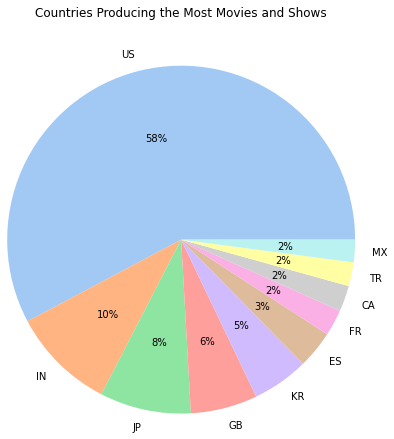

In [24]:

values = [1275,213,187,137,116,77,54,53,49,46]
labels = ['US','IN','JP','GB','KR','ES','FR','CA','TR','MX']
pie_colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=pie_colors, autopct='%.0f%%', radius=2)
plt.title("Countries Producing the Most Movies and Shows",y=1.50)
plt.show()

The United States of America produces more than half of the TV shows and movies found on Netflix, followed by India and Japan. As a streaming service company founded in the United States, it is reasonable that the majority of titles would be produced from there.

Now we will compare based on IMDB Ratings.

In [25]:
top_10_imdb = data.sort_values(['imdb_score'], ascending=False)[['title','imdb_score','type']].head(10)
top_10_imdb

,title,imdb_score,type
id,,,
ts4,Breaking Bad,9.5,SHOW
ts3371,Avatar: The Last Airbender,9.3,SHOW
ts85398,Our Planet,9.3,SHOW
ts90621,Kota Factory,9.3,SHOW
ts296563,Who Rules The World,9.2,SHOW
ts78298,My Mister,9.2,SHOW
ts37660,Reply 1988,9.2,SHOW
ts81120,The Last Dance,9.1,SHOW
ts222333,Arcane,9.1,SHOW


In [26]:
top_10_tmdb = data.sort_values(['tmdb_score'], ascending=False)[['title','tmdb_score','type']].head(10)
top_10_tmdb

,title,tmdb_score,type
id,,,
tm678035,Uncle Naji in UAE,10.0,MOVIE
ts223115,The Charming Stepmom,10.0,SHOW
ts84555,The Unknown Hitman: The Story of El Cholo Adrián,10.0,SHOW
ts214462,The Queen and the Conqueror,10.0,SHOW
ts224261,Nailed It! Germany,10.0,SHOW
ts317526,Selling Tampa,10.0,SHOW
ts253288,Felipe Esparza: Bad Decisions,10.0,SHOW
ts14520,Action Pack,10.0,SHOW
ts192297,Morphle,10.0,SHOW


The top 10 IMDb titles and top 10 TMDB titles are not close at all! In fact, one of the top 10 titles of TMDB is "Little Baby Bum," a children's animated nursery song program.

Another thing to note is that the highest rating for a title on IMDb is 9.5, while there are 10 titles with perfect 10.0 ratings on TMDB.

We will view how IMDb and TMDB scores have changed over time with a movie's or TV show's release.

In [27]:
year_vs_scores = data.groupby('release_year').agg({'imdb_score':'mean','tmdb_score':'mean'})
year_vs_scores.head()

,imdb_score,tmdb_score
release_year,,
1964,7.8,7.6
1966,7.3,7.1
1967,7.7,7.5
1969,8.8,8.3
1971,7.7,7.5


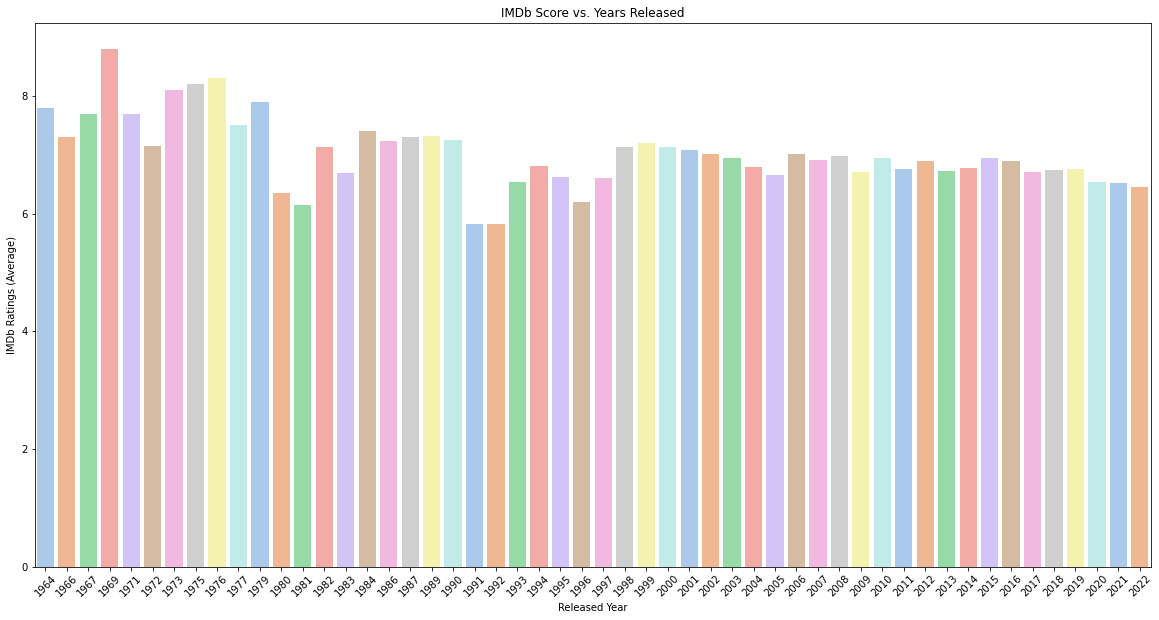

In [28]:
plt.figure(figsize=(20,10))
palette = sns.color_palette('pastel')
sns.barplot(x=year_vs_scores.index,y=year_vs_scores['imdb_score'],palette=palette)
plt.title('IMDb Score vs. Years Released')
plt.ylabel('IMDb Ratings (Average)')
plt.xlabel('Released Year')
plt.xticks(rotation=45)
plt.show()

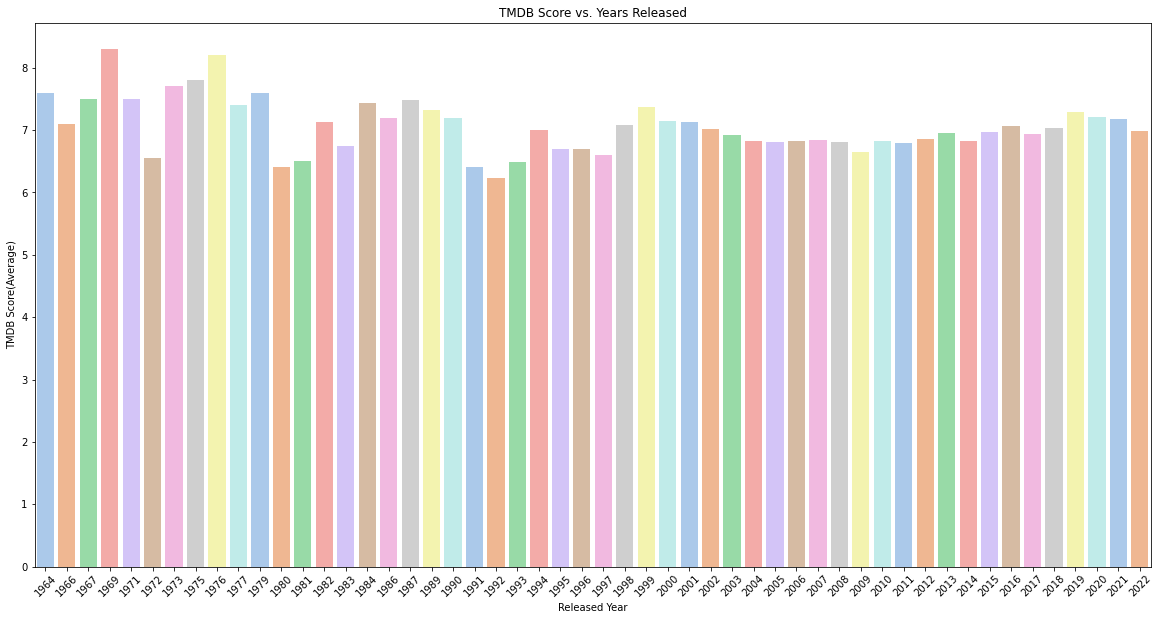

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x=year_vs_scores.index,y=year_vs_scores['tmdb_score'],palette=palette)
plt.title('TMDB Score vs. Years Released')
plt.ylabel('TMDB Score(Average)')
plt.xlabel('Released Year')
plt.xticks(rotation=45)
plt.show()

As we can see from comparing the two graphs, IMDb scores are generally lower than TMDB scores.

IMDb also is steadily decreasing in their ratings as time goes on, while TMDB ratings have been consistent.